## Import das bibliotecas

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

## Load do dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')
saude = pd.read_excel('/content/drive/My Drive/Atividade 6 - Saude.xlsx', sheet_name=0)

Mounted at /content/drive


In [ ]:
saude.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


## Criando objeto para plot do kmeans

In [82]:
def plot_kmeans(data, clusters, estimator):
  fig = plt.figure(figsize=(12, 6))

  ax = fig.add_subplot(121)
  ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='Dark2')
  ax.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], marker='X', s=250, linewidths=2, color='red')
  ax.set_xlabel('Peso')
  ax.set_ylabel('Colesterol')
  ax.legend()

  ax = fig.add_subplot(122, projection='3d')
  ax.scatter(data.iloc[:, 2], data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='Dark2')
  ax.scatter(estimator.cluster_centers_[:, 2], estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], marker='X', s=250, linewidths=2, color='red')
  ax.set_xlabel('Genero')
  ax.set_ylabel('Peso')
  ax.set_zlabel('Colesterol')


  plt.show()


  print('silhueta', metrics.silhouette_score(data, estimator.labels_, metric='euclidean'))
  print('centroides:\n', pd.DataFrame(estimator.cluster_centers_, columns=['Peso', 'Colesterol', 'Genero']))

## Kmeans com k = 2

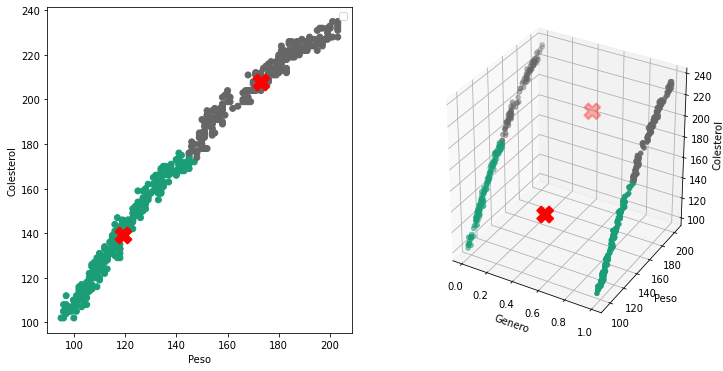

silhueta 0.6313844868675242
centroides:
          Peso  Colesterol    Genero
0  119.073826  139.348993  0.479866
1  172.891566  207.634538  0.554217


In [83]:
kmeans_k2 = KMeans(n_clusters=2, random_state=0).fit(saude)
y_pred = kmeans_k2.predict(saude)

plot_kmeans(saude, y_pred, kmeans_k2)

## Kmeans com k = 4

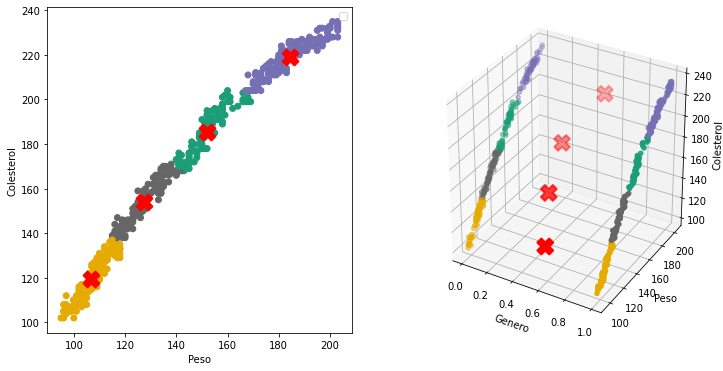

silhueta 0.5711283009977295
centroides:
          Peso  Colesterol    Genero
0  151.891667  185.633333  0.433333
1  184.318182  218.915584  0.590909
2  106.791367  119.402878  0.546763
3  127.447761  154.037313  0.462687


In [84]:
kmeans_k4 = KMeans(n_clusters=4, random_state=0).fit(saude)
y_pred = kmeans_k4.predict(saude)

plot_kmeans(saude, y_pred, kmeans_k4)

## kmeans com k = 2 normalizado

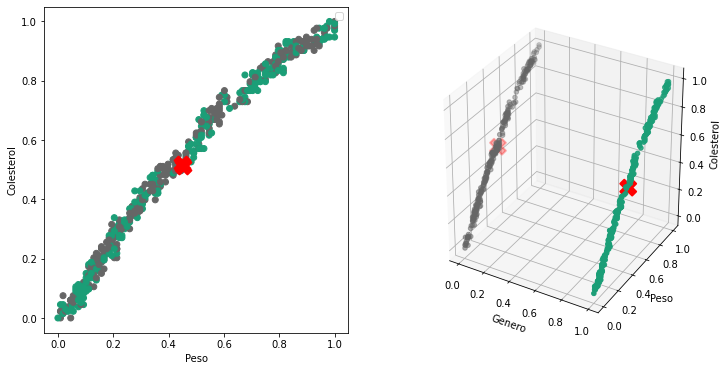

silhueta 0.5889441162904384
centroides:
        Peso  Colesterol        Genero
0  0.451529    0.511519  1.000000e+00
1  0.447856    0.517723  1.998401e-15


In [85]:
min_max = preprocessing.MinMaxScaler()
saude_scaled = pd.DataFrame(min_max.fit_transform(saude))

kmeans_k2_norm = KMeans(n_clusters=2, random_state=0).fit(saude_scaled)
y_pred = kmeans_k2_norm.predict(saude_scaled)

plot_kmeans(saude_scaled, y_pred, kmeans_k2_norm)

## Kmeans com k = 4 normalizado

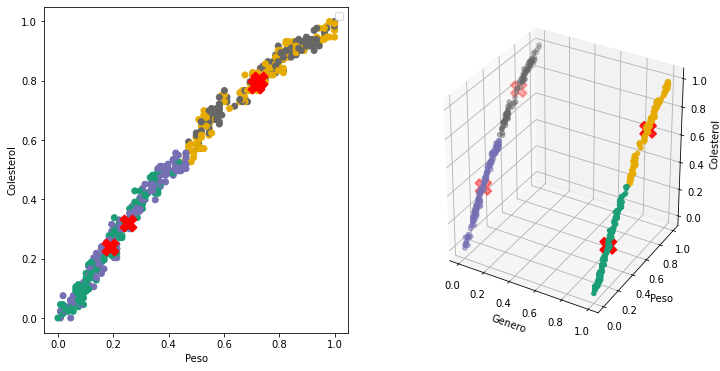

silhueta 0.6432944835931945
centroides:
        Peso  Colesterol        Genero
0  0.187549    0.237775  1.000000e+00
1  0.254600    0.319860  1.554312e-15
2  0.717394    0.787218  1.000000e+00
3  0.726215    0.802718  9.992007e-16


In [86]:
min_max = preprocessing.MinMaxScaler()
saude_scaled = pd.DataFrame(min_max.fit_transform(saude))

kmeans_k4_norm = KMeans(n_clusters=4, random_state=0).fit(saude_scaled)
y_pred = kmeans_k4_norm.predict(saude_scaled)

plot_kmeans(saude_scaled, y_pred, kmeans_k4_norm)

## Conclusões

Contudo o cluster cinza foi mais voltado para o gênero masculino, com peso de 174 e colesterol de 207.
Concluindo nesse caso uma maior tendência de homem ter maior peso e maior colesterol

No kmeans com k=4 tivemos menor peso e menor colesterol voltado para o gênero masculino 0.54, porém também maior peso e colesterol voltado para o gênero masculino
0.59, tendo o gênero masculino nos dois extremos.
Com isso concluimos que temos mais incidência de homens com valores maiores e menores de peso e colesterol e o gênero feminino nos valores intermediarios 
entre os valores maiores e menores.